In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Q1 (8 Marks)

a. Read the dataset. What are the number of rows and columns and type of variables?

b. explain the five point summary of the dataset

c. What is distribution in catgeory columns. % of obs in each category.

d. Check for the defects, missing values, outliers and class imbalance.

In [32]:
# Q1 a)

data = pd.read_excel('data (1).xlsx')

In [33]:
print('No of rows:',data.shape[0])
print('No of columns:',data.shape[1])

No of rows: 5000
No of columns: 14


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [35]:
# Although all the columns are number type, but there are categories
# which have been encoded.


In [36]:
cat_cols = ['Family','Education','Personal Loan','CD Account','Online',
           'Securities Account','CreditCard']
num_cols = ['ID','Age','Experience','Income','ZIP Code','CCAvg','Mortgage']

So In a dataset we have 7 category columns and 7 number columns

In [37]:
# Q1 b)

data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [38]:
# Q1) c)

for i in cat_cols:
    print('column:',i)
    print((data[i].value_counts(normalize=True))*100)
    print()

column: Family
1    29.44
2    25.92
4    24.44
3    20.20
Name: Family, dtype: float64

column: Education
1    41.92
3    30.02
2    28.06
Name: Education, dtype: float64

column: Personal Loan
0    90.4
1     9.6
Name: Personal Loan, dtype: float64

column: CD Account
0    93.96
1     6.04
Name: CD Account, dtype: float64

column: Online
1    59.68
0    40.32
Name: Online, dtype: float64

column: Securities Account
0    89.56
1    10.44
Name: Securities Account, dtype: float64

column: CreditCard
0    70.6
1    29.4
Name: CreditCard, dtype: float64



In [39]:
# Q1 d)

# Missing Values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

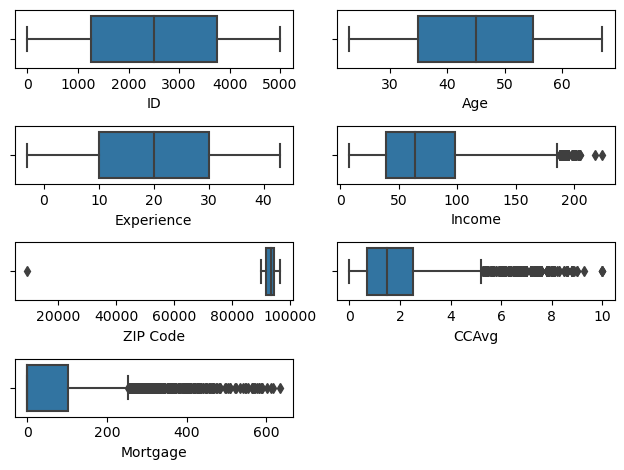

In [40]:
# Outliers

t = 1
for i in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data[i])
    t+=1
plt.tight_layout()
plt.show()
    

Income, Mortgage and CCAvg have some outliers

In [43]:
# Class Imbalance

(data['Personal Loan'].value_counts(normalize=True))*100

0    90.4
1     9.6
Name: Personal Loan, dtype: float64

The target class seems to be imbalanced

### Q2 (17 marks)

a. Fix the defects

b. Find out the variables which are hight correlated withe target using relevent plot

c. What variables can be excluded from the models.

d. Perform encoding.

e. Split the data into train and test (70:30). Are both train and test representative of the overall data. How will you acertain it statistically?

In [44]:
# Q2 a)

# No Missing Values

# No extreme Outliers (We will make the model using same dist)

# Although the target class is imbalanced we will make the base model with
# imbalanced data.

<AxesSubplot:>

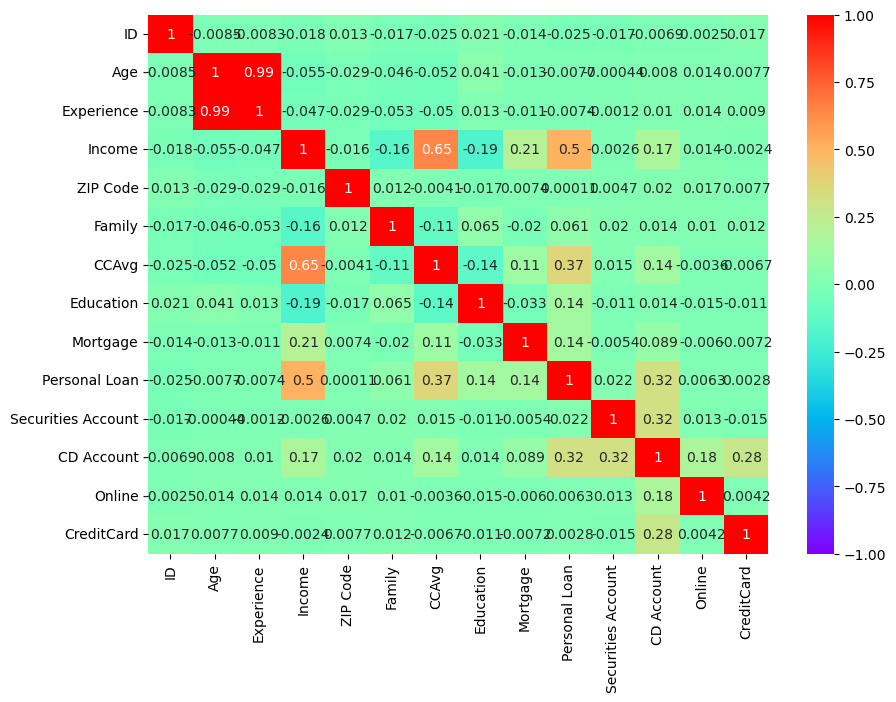

In [47]:
# Q2 b)
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1,cmap='rainbow')

* Age and Experience are highly correlated
* Income and CCAvg shows good positve correlation.
* Income also shows good correkation with the target (Personal Loan)

In [48]:
# Q2 c)

# Lets drop Drop ID as it is only the representation of indivisual rows.

del data['ID']

In [49]:
# Q2 d)

# The data is already encoded.

In [50]:
# Q2 e)

from sklearn.model_selection import train_test_split

In [75]:
x = data.drop(columns=['Personal Loan'])
y = data['Personal Loan']

x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                train_size=0.7,
                                                 stratify=y,
                                                random_state=1)

In [76]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(3500, 12) (3500,) (1500, 12) (1500,)


In [77]:
# To proove that the distribution in y_train and y_test is same as y
# We will chi-square goodness of fit.

In [78]:
expected = y.value_counts(normalize=True).values

In [79]:
observed_test = y_test.value_counts(normalize=True).values

In [80]:
import scipy.stats as stats

In [81]:
# Ho: The distribution is same
# Ha: The distribution is not same

stats.chisquare(observed_test,expected)

Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [82]:
observed_train = y_train.value_counts(normalize=True).values

In [83]:
# Ho: The distribution is same
# Ha: The distribution is not same

stats.chisquare(observed_train,expected)

Power_divergenceResult(statistic=0.0, pvalue=1.0)

### Q3 (25 Marks)

a. Fit a base model also explain reason to selecting that model. Write down the key observation.

b. What is the overall accuracy. Comment.

c. Evaluate the other scoring metrics. What will be the objective while optimizing the model.

d. How will you improve the prediction. Mention what all changes you will make to get the final model.

e. Write down the business interpretation. Which variables affecting the target variable most.

In [84]:
# Q3 a)

# Base model: Logistic Regression (For business interpretation)

import statsmodels.api as sma

In [113]:
base_model = sma.Logit(y_train,sma.add_constant(x_train)).fit()
base_model.summary()

Optimization terminated successfully.
         Current function value: 0.122140
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           12
Date:                Mon, 18 Mar 2024   Pseudo R-squ.:                  0.6137
Time:                        12:33:11   Log-Likelihood:                -427.49
converged:                       True   LL-Null:                       -1106.7
Covariance Type:            nonrobust   LLR p-value:                1.261e-283
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -14.8946      5.221     -2.853      0.004     -25.128      -4.661
Age                   -0.0405      0.074     -0.549      0.583      -0.185       0.104
Experience             0.0557      0.073      0.759      0.448      -0.088       0.199
Income                 0.0605      0.003     17.759      0.000       0.054       0.067
ZIP Code              1.5e-05   5.19e-05      0.289      0.772   -8.67e-05       0.000
Family                 0.6783      0.090      7.527      0.000       0.502       0.855
CCAvg                  0.0643      0.049      1.323      0.186      -0.031       0.160
Education              1.9155      0.147     13.045      0.000       1.628       2.203
Mortgage               0.0007      0.001      1.014      0.310      -0.001       0.002
Securities Account    -1.0603      0.357     -2.970      0.003      -1.760      -0.361
CD Account             3.7318      0.405      9.217      0.000       2.938       4.525
Online                -0.6642      0.194     -3.418      0.001      -1.045      -0.283
CreditCard            -1.1474      0.252     -4.562      0.000      -1.640      -0.654
======================================================================================
"""

In [93]:
# Pseudo R2
1 - (base_model.llf/base_model.llnull)

0.6137304671829036

In [ ]:
# Since Age and Experience Have high Multicolinearity we need to remove 
# any of them

In [99]:
base_model2 = sma.Logit(y_train,sma.add_constant(x_train.drop(columns=['Age']))).fit()
base_model2.summary()

Optimization terminated successfully.
         Current function value: 0.122184
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Mon, 18 Mar 2024   Pseudo R-squ.:                  0.6136
Time:                        12:15:37   Log-Likelihood:                -427.64
converged:                       True   LL-Null:                       -1106.7
Covariance Type:            nonrobust   LLR p-value:                1.290e-284
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -15.8745      4.909     -3.234      0.001     -25.496      -6.253
Experience             0.0156      0.008      1.961      0.050    4.65e-06       0.031
Income                 0.0605      0.003     17.789      0.000       0.054       0.067
ZIP Code            1.463e-05   5.19e-05      0.282      0.778    -8.7e-05       0.000
Family                 0.6794      0.090      7.542      0.000       0.503       0.856
CCAvg                  0.0642      0.049      1.319      0.187      -0.031       0.159
Education              1.9032      0.145     13.118      0.000       1.619       2.188
Mortgage               0.0007      0.001      0.993      0.321      -0.001       0.002
Securities Account    -1.0596      0.357     -2.970      0.003      -1.759      -0.360
CD Account             3.7357      0.405      9.231      0.000       2.943       4.529
Online                -0.6642      0.194     -3.419      0.001      -1.045      -0.283
CreditCard            -1.1447      0.251     -4.552      0.000      -1.638      -0.652
======================================================================================
"""

In [101]:
base_model2.pvalues[base_model2.pvalues<0.05].sort_values()

Income                8.601364e-71
Education             2.597951e-39
CD Account            2.680049e-20
Family                4.643038e-14
CreditCard            5.319688e-06
Online                6.286423e-04
const                 1.221739e-03
Securities Account    2.979375e-03
Experience            4.993194e-02
dtype: float64

In [102]:
### Model Significance
# LLrt (Log Liklihood ratio test) to test the significance of the model

# Ho: The model is not signicant
# Ha: The model is significant

llr = -2*(base_model2.llnull - base_model2.llf)
llr

1358.1425802365375

In [103]:
base_model2.llr

1358.1425802365375

In [108]:
# We see this statistic in chisquare dist with dof= df of model
stats.chi2.sf(llr,11)

1.2904212728029903e-284

In [105]:
base_model2.llr_pvalue

1.2904212728029903e-284

In [109]:
# Q3 b.

In [114]:
prob = base_model.predict(sma.add_constant(x_test))

In [116]:
y_pred = np.where(prob>0.5,1,0)

In [121]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [118]:
print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 0.9473333333333334


Although accuracy seems to very good, but we need check for other metrics aswell. We might not get good precision and recall in minority class.

In [120]:
# Q3. C)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.80      0.60      0.69       144

    accuracy                           0.95      1500
   macro avg       0.88      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500



In [122]:
print(confusion_matrix(y_test,y_pred))

[[1335   21]
 [  58   86]]


Since we need a model which could classify the the customer who have good chances to take the loan. our focus should be on recall of 1 while deciding the final model. 

In [127]:
# Q3 d)
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score,roc_curve,recall_score,precision_score,f1_score

In [143]:
models = []
accuracy = []
precison = []
recall = []
f1 = []

In [144]:
def model_validation(model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(xtrain,ytrain)
    pred = m.predict(xtest)
    prob = m.predict_proba(xtest)[:,1]
    
    print('Confusion matrix:\n',confusion_matrix(ytest,pred))
    print('Classification report:\n',classification_report(ytest,pred))
    print('ROC AUC:',roc_auc_score(ytest,prob))
    
    fpr,tpr,_ = roc_curve(ytest,prob)
    plt.plot(fpr,tpr,color='green')
    plt.plot([0,1],[0,1],color='red')
    plt.show()
    
    resp = input('Do you want to save this model in summary? Y/N')
    if resp.lower() == 'y':
        models.append(str(m))
        accuracy.append(accuracy_score(ytest,pred))
        recall.append(recall_score(ytest,pred))
        precison.append(precision_score(ytest,pred))
        f1.append(f1_score(ytest,pred))
        global models_df
        models_df = pd.DataFrame({'Model':models,
                                 'Accuracy':accuracy,
                                 'Recall':recall,
                                 'Precesion':precison,
                                 'F1':f1})
    else:
        return

Confusion matrix:
 [[1261   95]
 [  57   87]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      1356
           1       0.48      0.60      0.53       144

    accuracy                           0.90      1500
   macro avg       0.72      0.77      0.74      1500
weighted avg       0.91      0.90      0.90      1500

ROC AUC: 0.9340124139626352


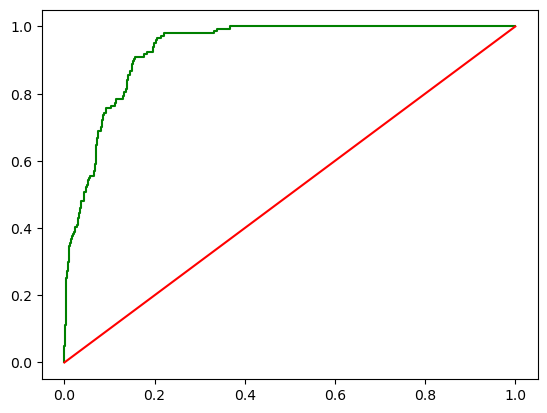

Do you want to save this model in summary? Y/Ny


In [145]:
# Naive Bayes
model_validation(GaussianNB(),x_train,y_train,x_test,y_test)

Confusion matrix:
 [[1347    9]
 [  15  129]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.93      0.90      0.91       144

    accuracy                           0.98      1500
   macro avg       0.96      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500

ROC AUC: 0.9880085422812193


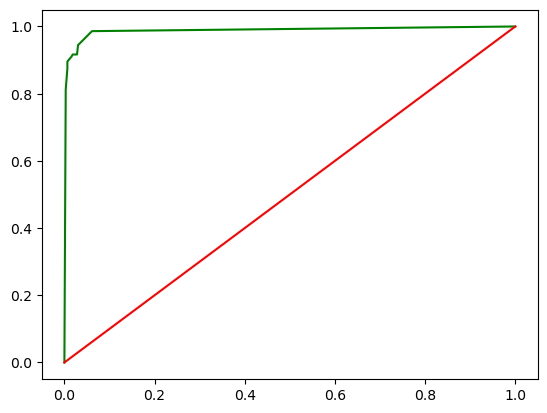

Do you want to save this model in summary? Y/Ny


In [146]:
# Descion tree
model_validation(DecisionTreeClassifier(max_depth=5),x_train,y_train,
                x_test,y_test)

In [147]:
models_df

,Model,Accuracy,Recall,Precesion,F1
0,GaussianNB(),0.898667,0.604167,0.478022,0.533742
1,DecisionTreeClassifier(max_depth=5),0.984000,0.895833,0.934783,0.914894


Confusion matrix:
 [[1348    8]
 [  14  130]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.94      0.90      0.92       144

    accuracy                           0.99      1500
   macro avg       0.97      0.95      0.96      1500
weighted avg       0.99      0.99      0.99      1500

ROC AUC: 0.9967787200917733


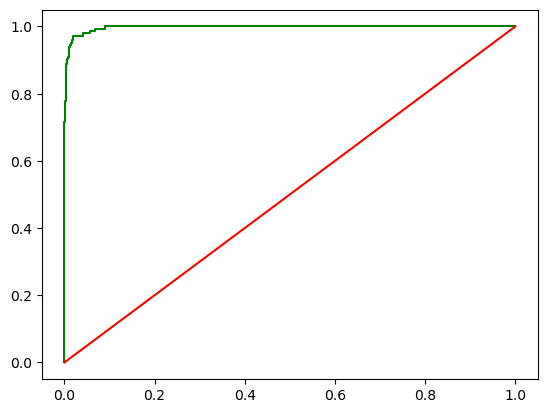

Do you want to save this model in summary? Y/Ny


In [149]:
model_validation(GradientBoostingClassifier(n_estimators=100),x_train,y_train,
                x_test,y_test)

In [150]:
models_df

,Model,Accuracy,Recall,Precesion,F1
0,GaussianNB(),0.898667,0.604167,0.478022,0.533742
1,DecisionTreeClassifier(max_depth=5),0.984000,0.895833,0.934783,0.914894
2,GradientBoostingClassifier(),0.985333,0.902778,0.942029,0.921986


In [151]:
# Gradient Boosting is giving best recall among all the models. 
# Lets fine tune this model

In [153]:
from sklearn.model_selection import GridSearchCV

In [152]:
params = {'learning_rate':[1,0.1,0.01],
         'n_estimators':[50,75,100,120],
         'max_depth':[5,6,7,8,9]}

In [154]:
gscv = GridSearchCV(estimator=GradientBoostingClassifier(),
                   param_grid=params,
                   cv=5,verbose=1,scoring='f1')

In [155]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [1, 0.1, 0.01],
                         'max_depth': [5, 6, 7, 8, 9],
                         'n_estimators': [50, 75, 100, 120]},
             scoring='f1', verbose=1)

In [156]:
gscv.best_score_

0.9350563971050636

In [157]:
gscv.best_params_

{'learning_rate': 1, 'max_depth': 5, 'n_estimators': 120}

In [158]:
final_model = GradientBoostingClassifier(**gscv.best_params_)

Confusion matrix:
 [[1339   17]
 [  16  128]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.88      0.89      0.89       144

    accuracy                           0.98      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500

ROC AUC: 0.9625609431333989


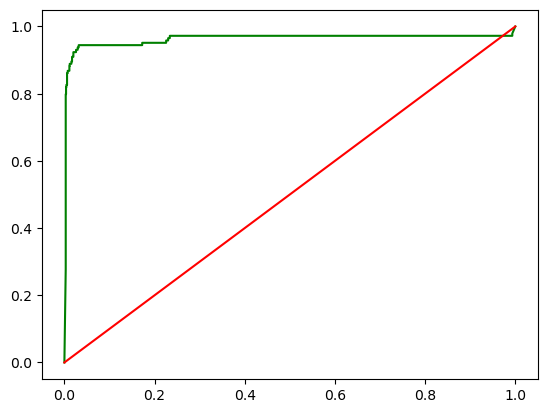

Do you want to save this model in summary? Y/Ny


In [159]:
model_validation(final_model,x_train,y_train,x_test,y_test)

In [160]:
models_df

,Model,Accuracy,Recall,Precesion,F1
0,GaussianNB(),0.898667,0.604167,0.478022,0.533742
1,DecisionTreeClassifier(max_depth=5),0.984000,0.895833,0.934783,0.914894
2,GradientBoostingClassifier(),0.985333,0.902778,0.942029,0.921986
3,"GradientBoostingClassifier(learning_rate=1, ma...",0.978000,0.888889,0.882759,0.885813


In [165]:
# Q3 e)

pd.DataFrame({'Features':x_test.columns,
              'Importance':final_model.feature_importances_})\
.sort_values(by=['Importance'],ascending=False)

,Features,Importance
2,Income,0.316767
10,Online,0.246444
3,ZIP Code,0.178898
6,Education,0.132775
4,Family,0.058305
5,CCAvg,0.041114
1,Experience,0.012717
0,Age,0.005878
7,Mortgage,0.003281
9,CD Account,0.002689
